<a href="https://colab.research.google.com/github/merdogan97/DL_Deep-Learning/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_20_06_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# **Dataset Info**

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# **Improt Libraries & Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8430,8431,15775949,Trevisani,612,France,Female,38,7,110615.470,1,1,1,193502.930,0
3184,3185,15631070,Gerasimova,667,Germany,Male,55,9,154393.430,1,1,1,137674.960,1
791,792,15643696,Young,611,France,Male,49,3,0.000,2,1,1,142917.540,0
6096,6097,15738884,Hu,642,Germany,Male,41,4,157777.580,1,1,0,67484.600,0
6123,6124,15714493,Francis,465,Spain,Female,33,6,0.000,2,1,1,95500.980,0
7235,7236,15629750,Artyomova,697,France,Male,35,5,133087.760,1,1,0,64771.610,0
7858,7859,15764726,Kerr,563,France,Male,22,3,137583.040,1,0,1,5791.850,0
5841,5842,15737267,Marcelo,676,France,Female,49,1,0.000,1,1,0,79342.310,1
7722,7723,15570086,Lynch,684,Germany,Male,18,9,90544.000,1,0,1,4777.230,0
8373,8374,15785167,Padovano,795,Spain,Male,29,4,0.000,2,0,0,155711.640,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


# **Exploratory Data Analysis and Visualization**

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

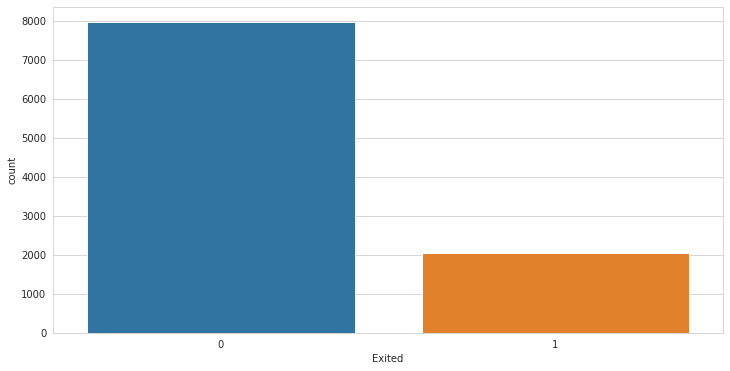

In [ ]:
sns.countplot(df["Exited"]);

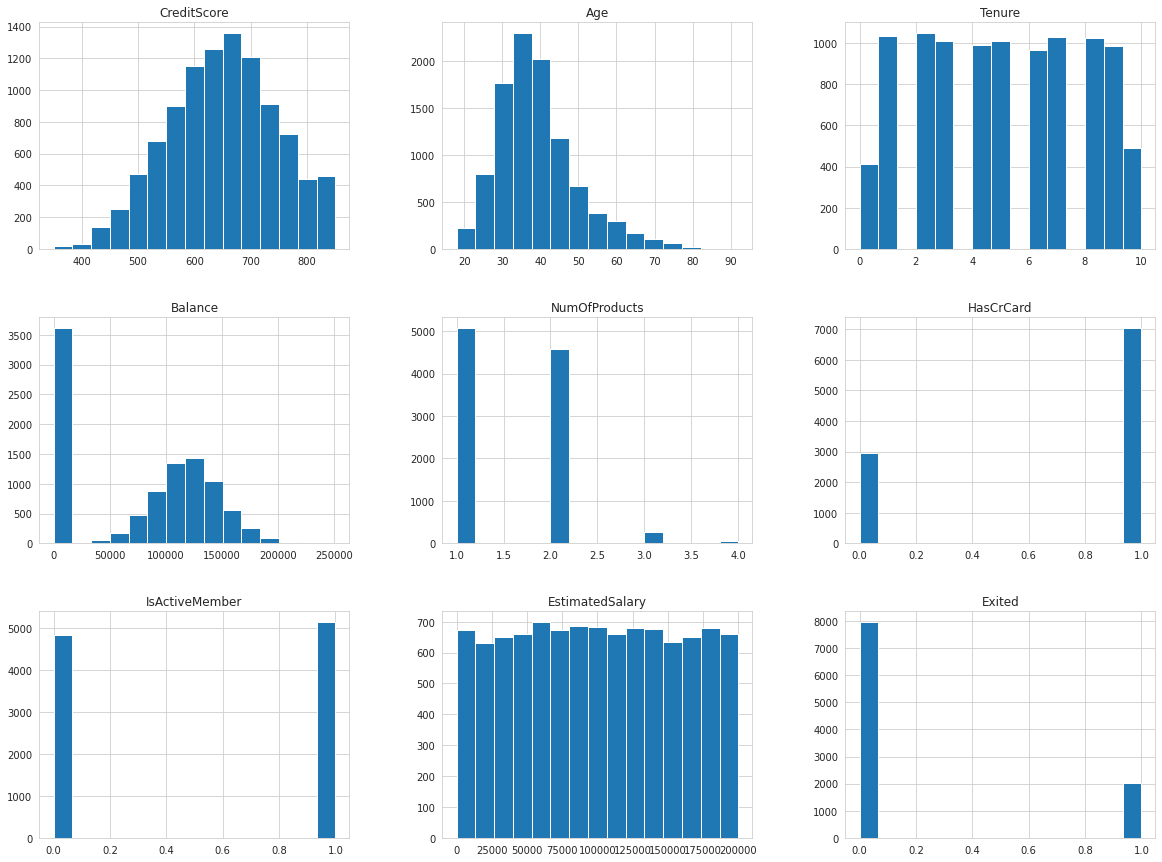

In [ ]:
df.hist(figsize=(20, 15), bins=15);

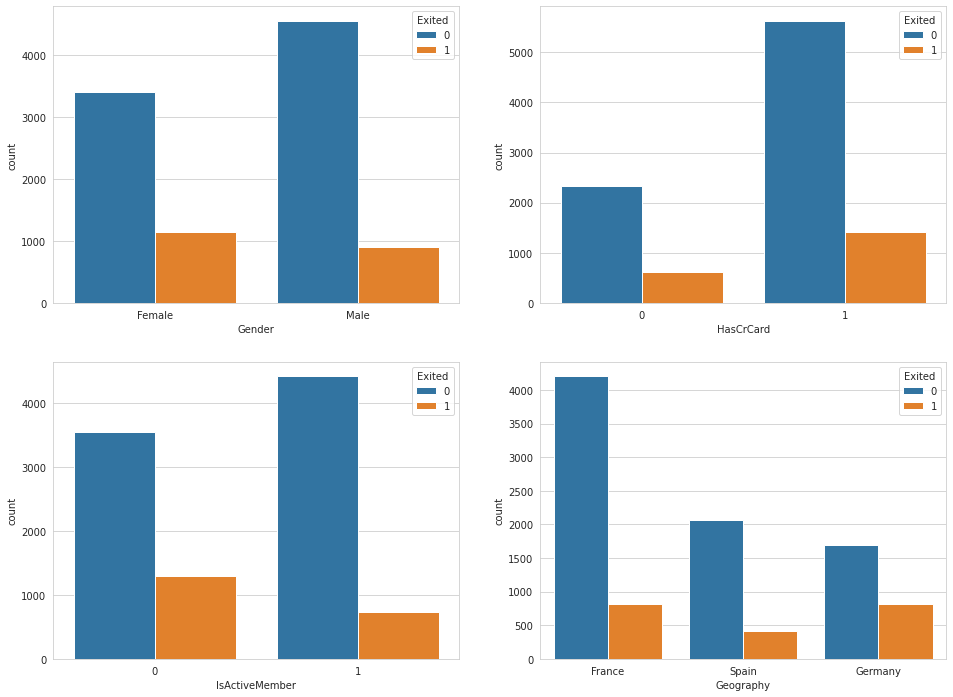

In [ ]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

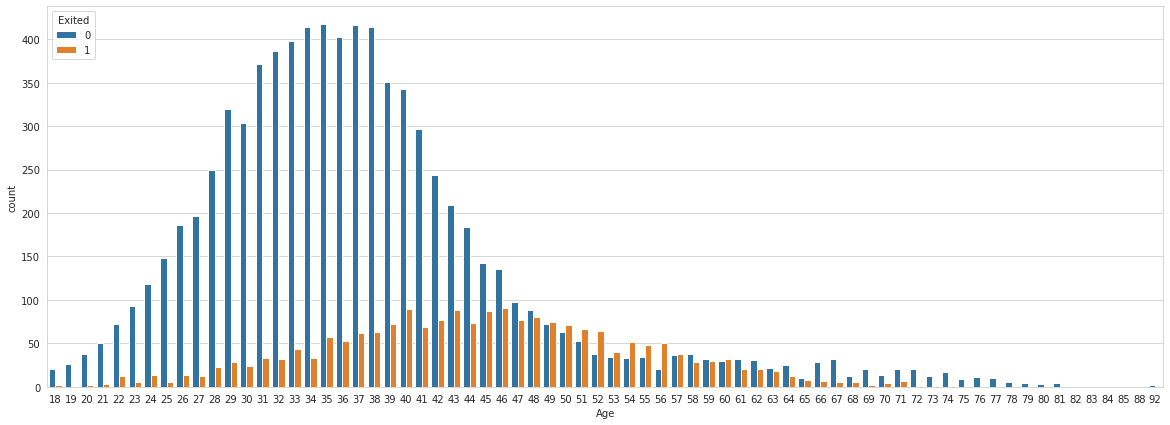

In [ ]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

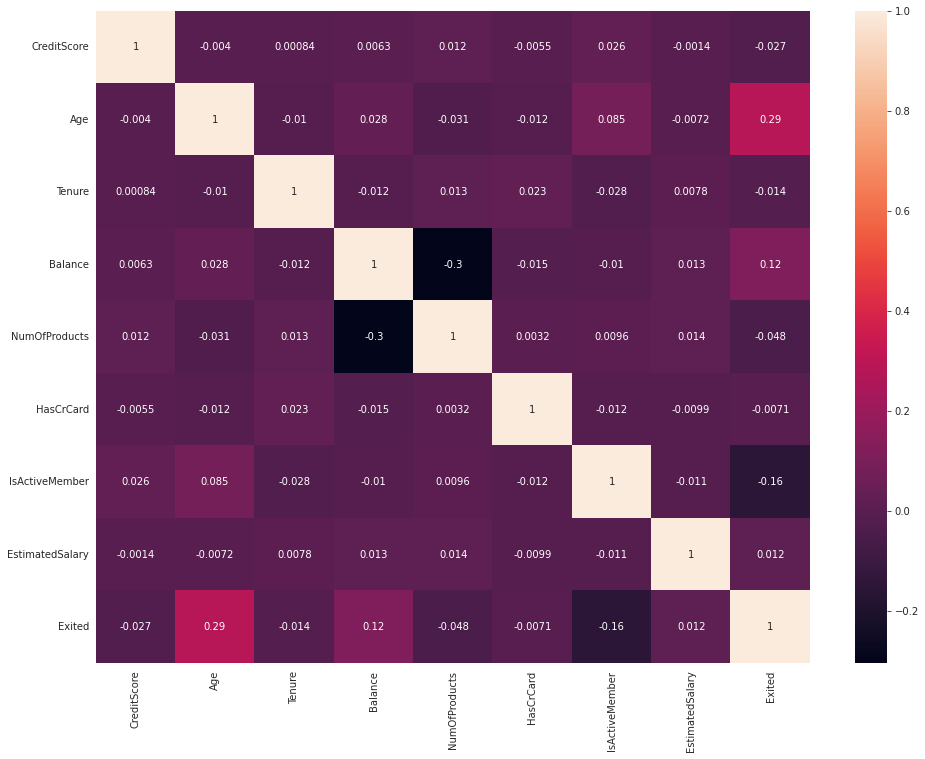

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True)

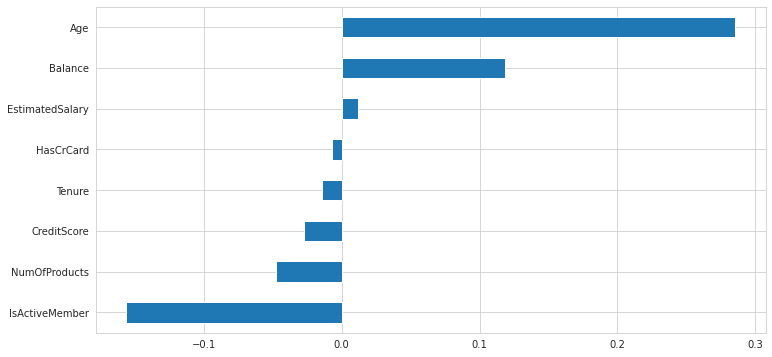

In [ ]:
df.corr()['Exited'][:-1].sort_values().plot.barh()

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# **Preprocessing of Data**
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.1,random_state=seed)                                             

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modelling & Model Performance**

# **without class_weigth**

# **Create The Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix   
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train.shape

(9000, 11)

In [ ]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=15)                

In [ ]:
model.fit(x=X_train, y=y_train, validation_split=.1,batch_size=128,    epochs=200,  verbose=1,   callbacks=[early_stop])      

Epoch 1/200
64/64 [==============================] - 1s 7ms/step - loss: 0.5353 - recall: 0.0000e+00 - val_loss: 0.4928 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4956 - recall: 0.0000e+00 - val_loss: 0.4804 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4864 - recall: 0.0000e+00 - val_loss: 0.4709 - val_recall: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4787 - recall: 0.0000e+00 - val_loss: 0.4604 - val_recall: 0.0055
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4710 - recall: 0.0303 - val_loss: 0.4492 - val_recall: 0.0884
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4643 - recall: 0.0587 - val_loss: 0.4437 - val_recall: 0.0663
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4598 - recall: 0.0841 - val_loss: 0.4369 - val_recall: 0.1215
Epoch 8/200
6

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 16)                192       
                                                                 
 dense_105 (Dense)           (None, 8)                 136       
                                                                 
 dense_106 (Dense)           (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


# **Evaluate The Model**

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.535,0.000,0.493,0.000
1,0.496,0.000,0.480,0.000
2,0.486,0.000,0.471,0.000
3,0.479,0.000,0.460,0.006
4,0.471,0.030,0.449,0.088


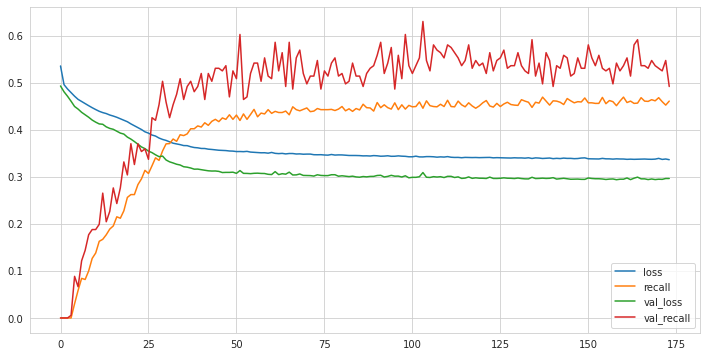

In [ ]:
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[744  52]
 [ 95 109]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       796
           1       0.68      0.53      0.60       204

    accuracy                           0.85      1000
   macro avg       0.78      0.73      0.75      1000
weighted avg       0.84      0.85      0.85      1000



In [ ]:
# ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

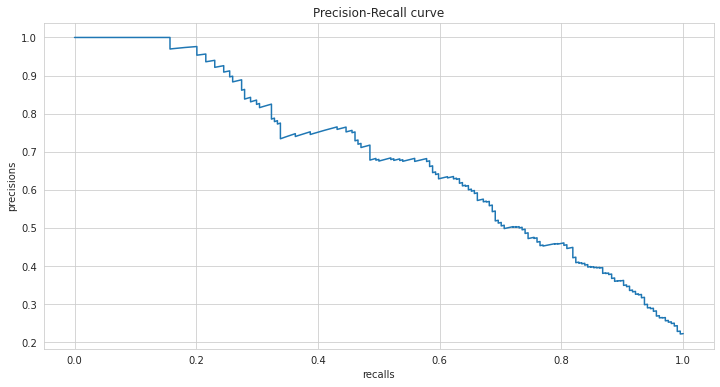

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.6838974397751364

# **with class_weigth**

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

# **Create The Model**

In [ ]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [ ]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 3s 12ms/step - loss: 0.6879 - recall: 0.2718 - val_loss: 0.6547 - val_recall: 0.4696
Epoch 2/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6680 - recall: 0.5097 - val_loss: 0.6417 - val_recall: 0.5856
Epoch 3/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6479 - recall: 0.6410 - val_loss: 0.6045 - val_recall: 0.6133
Epoch 4/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6317 - recall: 0.6628 - val_loss: 0.5740 - val_recall: 0.6188
Epoch 5/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6224 - recall: 0.6453 - val_loss: 0.6124 - val_recall: 0.7348
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6140 - recall: 0.6786 - val_loss: 0.5600 - val_recall: 0.6575
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6080 - recall: 0.6707 - val_loss: 0.5943 - val_recall: 0.7293
Epoch 8/200
64/64 [=====================

# **Evaluate The Model**

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.688,0.272,0.655,0.470
1,0.668,0.510,0.642,0.586
2,0.648,0.641,0.605,0.613
3,0.632,0.663,0.574,0.619
4,0.622,0.645,0.612,0.735


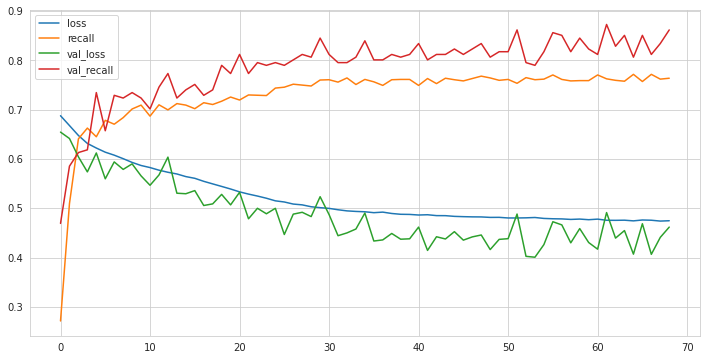

In [ ]:
loss_df.plot();

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[581 215]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       796
           1       0.43      0.78      0.55       204

    accuracy                           0.74      1000
   macro avg       0.68      0.76      0.69      1000
weighted avg       0.83      0.74      0.76      1000



In [ ]:
# ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

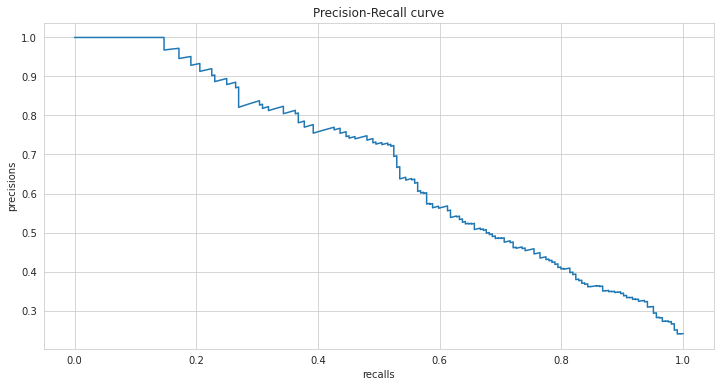

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [ ]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

0.6698036467091615

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs = 300, verbose = 1,
          callbacks = [early_stop])

Epoch 1/300
225/225 [==============================] - 2s 6ms/step - loss: 0.4790 - accuracy: 0.7922 - val_loss: 0.4382 - val_accuracy: 0.7917
Epoch 2/300
225/225 [==============================] - 1s 4ms/step - loss: 0.4275 - accuracy: 0.8100 - val_loss: 0.3998 - val_accuracy: 0.8178
Epoch 3/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3981 - accuracy: 0.8274 - val_loss: 0.3728 - val_accuracy: 0.8417
Epoch 4/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8408 - val_loss: 0.3551 - val_accuracy: 0.8500
Epoch 5/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3665 - accuracy: 0.8464 - val_loss: 0.3418 - val_accuracy: 0.8556
Epoch 6/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3629 - accuracy: 0.8482 - val_loss: 0.3423 - val_accuracy: 0.8528
Epoch 7/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3590 - accuracy: 0.8499 - val_loss: 0.3350 - val_accuracy: 0.8600

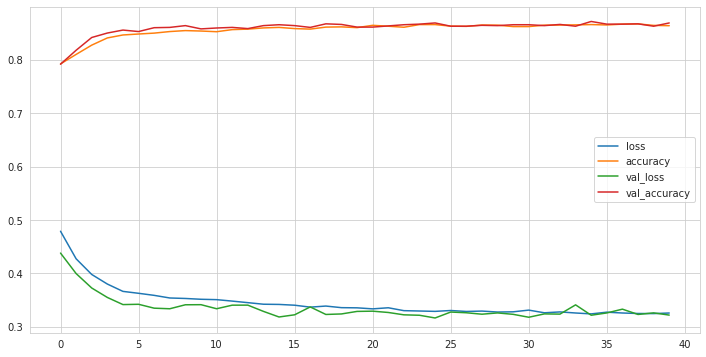

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3387300670146942
accuracy :  0.8610000014305115


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[772  24]
 [115  89]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.79      0.44      0.56       204

    accuracy                           0.86      1000
   macro avg       0.83      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



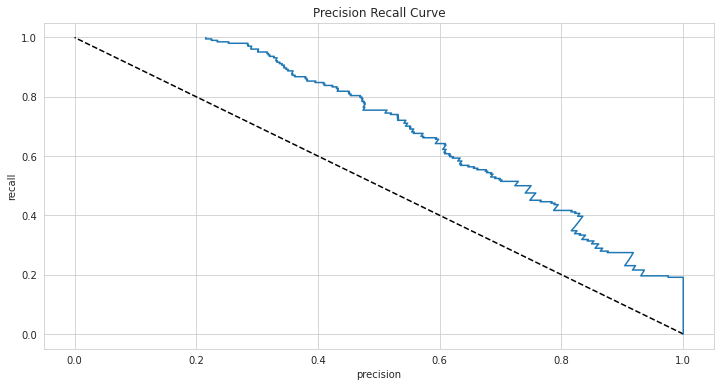

In [ ]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [ ]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.21610169, 0.21527041, 0.21549894, 0.21572795, 0.21595745,
        0.21618743, 0.21641791, 0.21664888, 0.21688034, 0.2171123 ,
        0.21734475, 0.21757771, 0.21781116, 0.21804511, 0.21827957,
        0.21851453, 0.21875   , 0.21898598, 0.21922246, 0.21945946,
        0.21969697, 0.21993499, 0.22017354, 0.2204126 , 0.22065217,
        0.22089227, 0.2211329 , 0.22137405, 0.22161572, 0.22185792,
        0.22210066, 0.22234392, 0.22258772, 0.22283205, 0.22307692,
        0.22332233, 0.22356828, 0.22381477, 0.22406181, 0.22430939,
        0.22455752, 0.2248062 , 0.22505543, 0.22530522, 0.22555556,
        0.2246941 , 0.22494432, 0.22519509, 0.22544643, 0.22569832,
        0.22595078, 0.22620381, 0.2264574 , 0.22671156, 0.22696629,
        0.2272216 , 0.22747748, 0.22773393, 0.22799097, 0.22824859,
        0.22850679, 0.22876557, 0.22902494, 0.2292849 , 0.22954545,
        0.2298066 , 0.23006834, 0.23033067, 0.23059361, 0.23085714,
        0.23112128, 0.23138603, 0.23165138, 0.23

# **Add Dropout Layer**

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs = 300, verbose = 1)

Epoch 1/300
225/225 [==============================] - 3s 6ms/step - loss: 0.6080 - accuracy: 0.7546 - val_loss: 0.5360 - val_accuracy: 0.7917
Epoch 2/300
225/225 [==============================] - 1s 5ms/step - loss: 0.5432 - accuracy: 0.7969 - val_loss: 0.5150 - val_accuracy: 0.7917
Epoch 3/300
225/225 [==============================] - 1s 5ms/step - loss: 0.5251 - accuracy: 0.7972 - val_loss: 0.5110 - val_accuracy: 0.7917
Epoch 4/300
225/225 [==============================] - 1s 4ms/step - loss: 0.5207 - accuracy: 0.7975 - val_loss: 0.5077 - val_accuracy: 0.7917
Epoch 5/300
225/225 [==============================] - 1s 3ms/step - loss: 0.5171 - accuracy: 0.7974 - val_loss: 0.5056 - val_accuracy: 0.7917
Epoch 6/300
225/225 [==============================] - 1s 3ms/step - loss: 0.5110 - accuracy: 0.7975 - val_loss: 0.5012 - val_accuracy: 0.7917
Epoch 7/300
225/225 [==============================] - 1s 3ms/step - loss: 0.5084 - accuracy: 0.7974 - val_loss: 0.4973 - val_accuracy: 0.7917

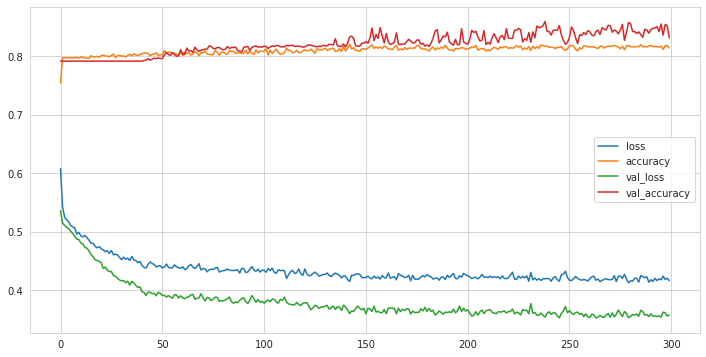

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3668549358844757
accuracy :  0.8309999704360962


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[791   5]
 [164  40]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       796
           1       0.89      0.20      0.32       204

    accuracy                           0.83      1000
   macro avg       0.86      0.59      0.61      1000
weighted avg       0.84      0.83      0.78      1000



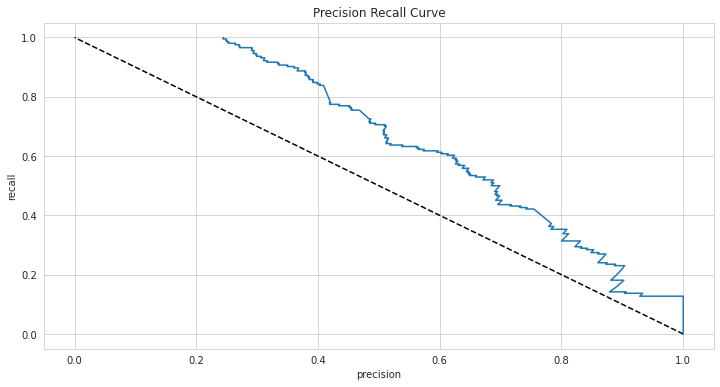

In [ ]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()


In [ ]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.24460432, 0.24369748, 0.24399038, 0.244284  , 0.24457831,
        0.24487334, 0.24516908, 0.24546554, 0.24576271, 0.24606061,
        0.24635922, 0.24665857, 0.24695864, 0.24725944, 0.24756098,
        0.24786325, 0.24816626, 0.24847001, 0.24877451, 0.24907975,
        0.24938575, 0.24846248, 0.24876847, 0.24907522, 0.24938272,
        0.24969098, 0.25      , 0.25030979, 0.25062035, 0.25093168,
        0.25      , 0.25031133, 0.25062344, 0.25093633, 0.25125   ,
        0.25156446, 0.2518797 , 0.25219573, 0.25251256, 0.25283019,
        0.25314861, 0.25346784, 0.25252525, 0.2528445 , 0.25316456,
        0.25348542, 0.25380711, 0.25412961, 0.25445293, 0.25477707,
        0.25510204, 0.25542784, 0.25575448, 0.25608195, 0.25641026,
        0.25673941, 0.25706941, 0.25740026, 0.25773196, 0.25806452,
        0.25839793, 0.25873221, 0.25906736, 0.25940337, 0.25974026,
        0.26007802, 0.26041667, 0.26075619, 0.26109661, 0.26143791,
        0.2617801 , 0.2621232 , 0.26246719, 0.26

# **Add Early Stop**

In [ ]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
class_weight = {0:0.62637018, 1:2.47831475}

#### Monitor the "val_loss" as metric

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)
early_stop

#### Monitor the "val_recall" as metric

In [ ]:
early_stop1 = EarlyStopping(monitor = "val_recall", mode = "auto", verbose = 1, patience = 15)

In [ ]:
early_stop1

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, class_weight = class_weight, batch_size = 32, epochs = 300, verbose = 1,
          callbacks = [early_stop])

Epoch 1/300
225/225 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.7803 - val_loss: 0.4738 - val_accuracy: 0.7667
Epoch 2/300
225/225 [==============================] - 1s 3ms/step - loss: 0.4662 - accuracy: 0.7807 - val_loss: 0.4216 - val_accuracy: 0.8100
Epoch 3/300
225/225 [==============================] - 1s 3ms/step - loss: 0.4645 - accuracy: 0.7797 - val_loss: 0.4143 - val_accuracy: 0.8128
Epoch 4/300
225/225 [==============================] - 1s 3ms/step - loss: 0.4646 - accuracy: 0.7857 - val_loss: 0.4239 - val_accuracy: 0.8061
Epoch 5/300
225/225 [==============================] - 1s 3ms/step - loss: 0.4624 - accuracy: 0.7808 - val_loss: 0.4419 - val_accuracy: 0.7861
Epoch 6/300
225/225 [==============================] - 1s 3ms/step - loss: 0.4634 - accuracy: 0.7835 - val_loss: 0.4505 - val_accuracy: 0.7872
Epoch 7/300
225/225 [==============================] - 1s 5ms/step - loss: 0.4636 - accuracy: 0.7839 - val_loss: 0.4967 - val_accuracy: 0.7494

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.466,0.780,0.474,0.767
1,0.466,0.781,0.422,0.810
2,0.465,0.780,0.414,0.813
3,0.465,0.786,0.424,0.806
4,0.462,0.781,0.442,0.786


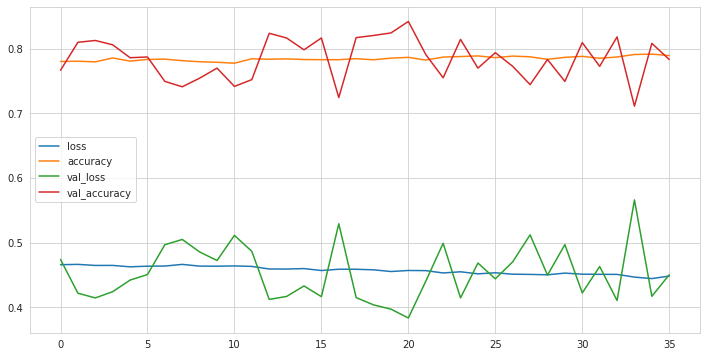

In [ ]:
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4678138494491577
accuracy :  0.7760000228881836


In [ ]:
model.evaluate(X_test, y_test, verbose=0)  

[0.4678138494491577, 0.7760000228881836]

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[625 171]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.74      0.57       204

    accuracy                           0.78      1000
   macro avg       0.70      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



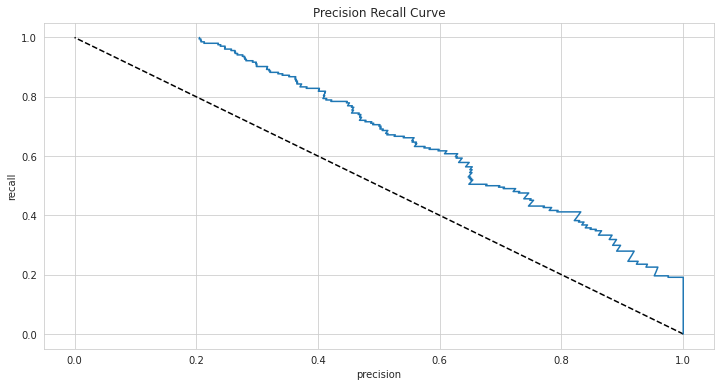

In [ ]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [ ]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.20543807, 0.2046371 , 0.20484359, 0.20505051, 0.20525784,
        0.20546559, 0.20567376, 0.20588235, 0.20609137, 0.20630081,
        0.20651068, 0.20672098, 0.2069317 , 0.20714286, 0.20735444,
        0.20756646, 0.20675537, 0.20696721, 0.20717949, 0.2073922 ,
        0.20760534, 0.20781893, 0.20803296, 0.20824742, 0.20846233,
        0.20764463, 0.20785936, 0.20807453, 0.20829016, 0.20850622,
        0.20872274, 0.20893971, 0.20915713, 0.209375  , 0.20959333,
        0.20981211, 0.21003135, 0.21025105, 0.2104712 , 0.21069182,
        0.21091291, 0.21113445, 0.21135647, 0.21157895, 0.2118019 ,
        0.21202532, 0.21224921, 0.21247357, 0.21269841, 0.21292373,
        0.21314952, 0.2133758 , 0.21253985, 0.21276596, 0.21299255,
        0.21321962, 0.21344717, 0.21367521, 0.21390374, 0.21413276,
        0.21436227, 0.21459227, 0.21482277, 0.21505376, 0.21528525,
        0.21551724, 0.21574973, 0.21598272, 0.21621622, 0.21645022,
        0.21668472, 0.21691974, 0.21715527, 0.21

# **GridSearchCV**

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [ ]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


KeyboardInterrupt: ignored

# **Evaluate The Model**

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
#ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
average_precision_score(y_test, y_pred_proba)

# **Final Model and Model Deployment**

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))
tf.random.set_seed(seed)

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
#optimizer will be changed.

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
#validation_split and validation_data is different. 
# if you write them together, validation_data will be used.  
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
141/141 [==============================] - 2s 6ms/step - loss: 0.5161 - accuracy: 0.7952 - val_loss: 0.4871 - val_accuracy: 0.7960
Epoch 2/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.4714 - accuracy: 0.7982 - val_loss: 0.4631 - val_accuracy: 0.8030
Epoch 3/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.4449 - accuracy: 0.8061 - val_loss: 0.4446 - val_accuracy: 0.8130
Epoch 4/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.4284 - accuracy: 0.8172 - val_loss: 0.4310 - val_accuracy: 0.8190
Epoch 5/1000
141/141 [==============================] - 1s 5ms/step - loss: 0.4179 - accuracy: 0.8201 - val_loss: 0.4230 - val_accuracy: 0.8250
Epoch 6/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.4090 - accuracy: 0.8253 - val_loss: 0.4110 - val_accuracy: 0.8330
Epoch 7/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.3981 - accuracy: 0.8303 - val_loss: 0.4013 - val_accuracy:

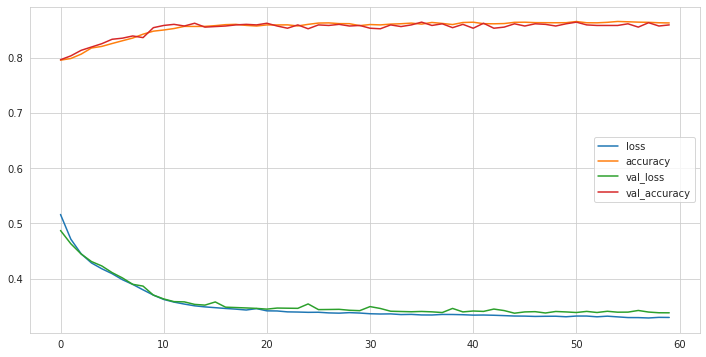

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33821186423301697
accuracy :  0.859000027179718


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[765  31]
 [110  94]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.75      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



In [ ]:
model.save('model_churn.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_churn = load_model('model_churn.h5') # for deployment we should load our h5 file of data.
scaler_churn = pickle.load(open("scaler_churn", "rb"))

# **Prediction**

In [ ]:
single_client = df.drop('Exited', axis = 1).iloc[0:15, :]
single_client

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,1,0
5,645,44,8,113755.780,2,1,0,149756.710,0,1,1
6,822,50,7,0.000,2,1,1,10062.800,0,0,1
7,376,29,4,115046.740,4,1,0,119346.880,1,0,0
8,501,44,4,142051.070,2,0,1,74940.500,0,0,1
9,684,27,2,134603.880,1,1,1,71725.730,0,0,1


In [ ]:
single_client = scaler_churn.transform(single_client)
single_client

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , 0.35156138, 0.        ,
        0.        , 1.        , 0.56270874, 0.        , 1.        ,
        0.        ],
       [0.304     , 0.32432432, 0.8       , 0.66975307, 0.66666667,
        1.        , 0.        , 0.56965435, 0.        , 0.        ,
        0.        ],
       [0.698     , 0.28378378, 0.1       , 0.        , 0.33333333,
        0.        , 0.        , 0.46912005, 0.        , 0.        ,
        0.        ],
       [1.        , 0.33783784, 0.2       , 0.52649903, 0.        ,
        1.        , 1.        , 0.39540036, 0.        , 1.        ,
        0.        ],
       [0.59      , 0.35135135, 0.8       , 0.47718841, 0.33333333,
        1.        , 0.        , 0.74879716, 0.        , 1.        ,
        1.        ],
       [0.944     , 0.43243243, 0.7       , 0.        , 0.

In [ ]:
(model_churn.predict(single_client) > 0.5).astype("int32")

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
df["Exited"].iloc[0:15]

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: Exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___